Realizamos un EDA de los dos datasets 'train.parquet' y 'test.parquet'. Para leer los archivos con formato parquet primero se deben instalar dos librerias: pysparoow y fasparquet.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
train_df=pd.read_parquet(r"Datasets/train.parquet")
test_df=pd.read_parquet(r"Datasets/test.parquet")


In [3]:
train_df.head(3)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va


In [4]:
test_df.head(3)

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,apartment,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi


In [5]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [6]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38498 non-null  int64  
 1   url                      38498 non-null  object 
 2   region                   38498 non-null  object 
 3   region_url               38498 non-null  object 
 4   type                     38498 non-null  object 
 5   sqfeet                   38498 non-null  int64  
 6   beds                     38498 non-null  int64  
 7   baths                    38498 non-null  float64
 8   cats_allowed             38498 non-null  int64  
 9   dogs_allowed             38498 non-null  int64  
 10  smoking_allowed          38498 non-null  int64  
 11  wheelchair_access        38498 non-null  int64  
 12  electric_vehicle_charge  38498 non-null  int64  
 13  comes_furnished          38498 non-null  int64  
 14  laundry_options       

 Vamos a ver los valores nulos en el conjunto de datos


In [7]:
train_df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

ver la distribución de los valores en las columnas categóricas


In [8]:
print(train_df.describe(include=['object']))

                                                      url        region  \
count                                              346479        346479   
unique                                             346479           404   
top     https://boise.craigslist.org/apa/d/very-nice-b...  jacksonville   
freq                                                    1          3849   

                          region_url       type laundry_options  \
count                         346479     346479          275308   
unique                           413         12               5   
top     https://omaha.craigslist.org  apartment     w/d in unit   
freq                            2465     286303          118627   

           parking_options                                          image_url  \
count               219797                                             346479   
unique                   7                                             168246   
top     off-street parking  https://images.cr

Graficamos las varaibles numéricas para ver su distribución.

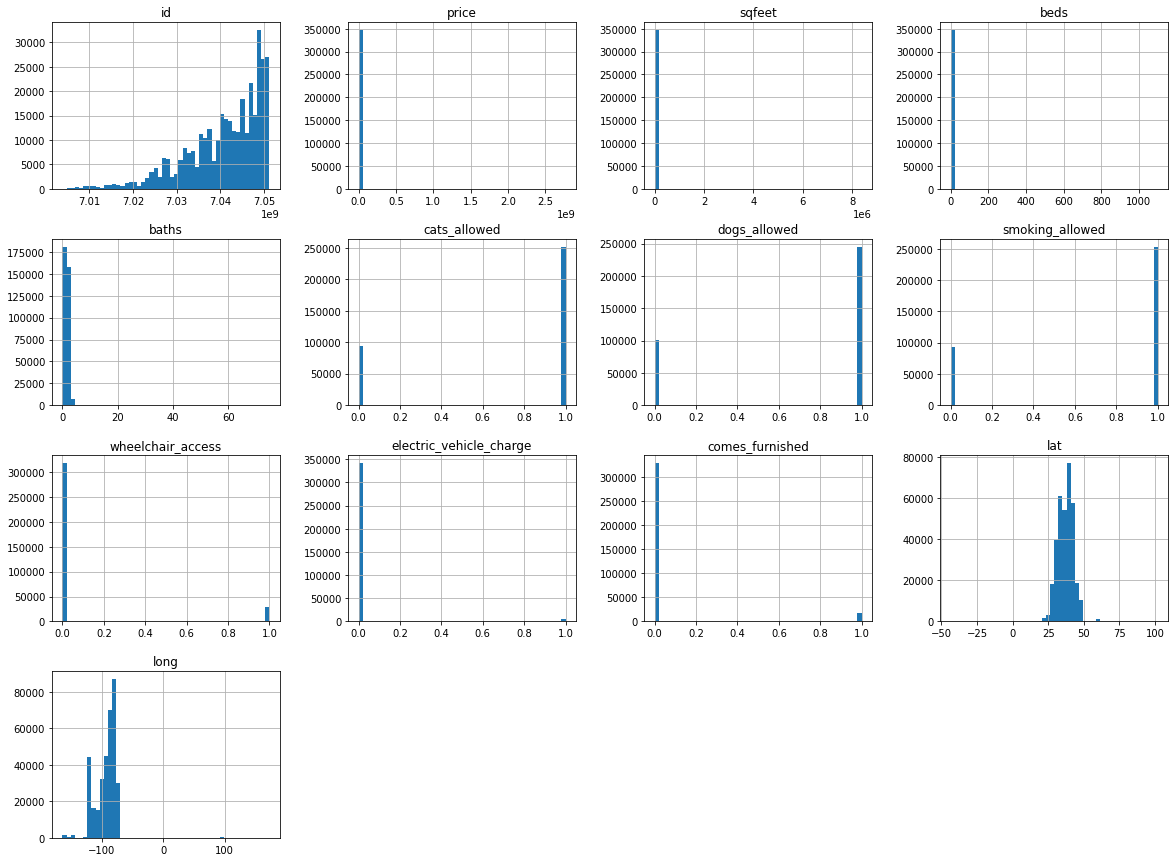

In [9]:
train_df.hist(bins=50, figsize=(20,15))
plt.show()

veamos un mapa de calor de la correlacion entre las variables

C:\Users\camil\AppData\Local\Temp\ipykernel_15860\2358958035.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),cmap=plt.cm.Reds,annot=True)


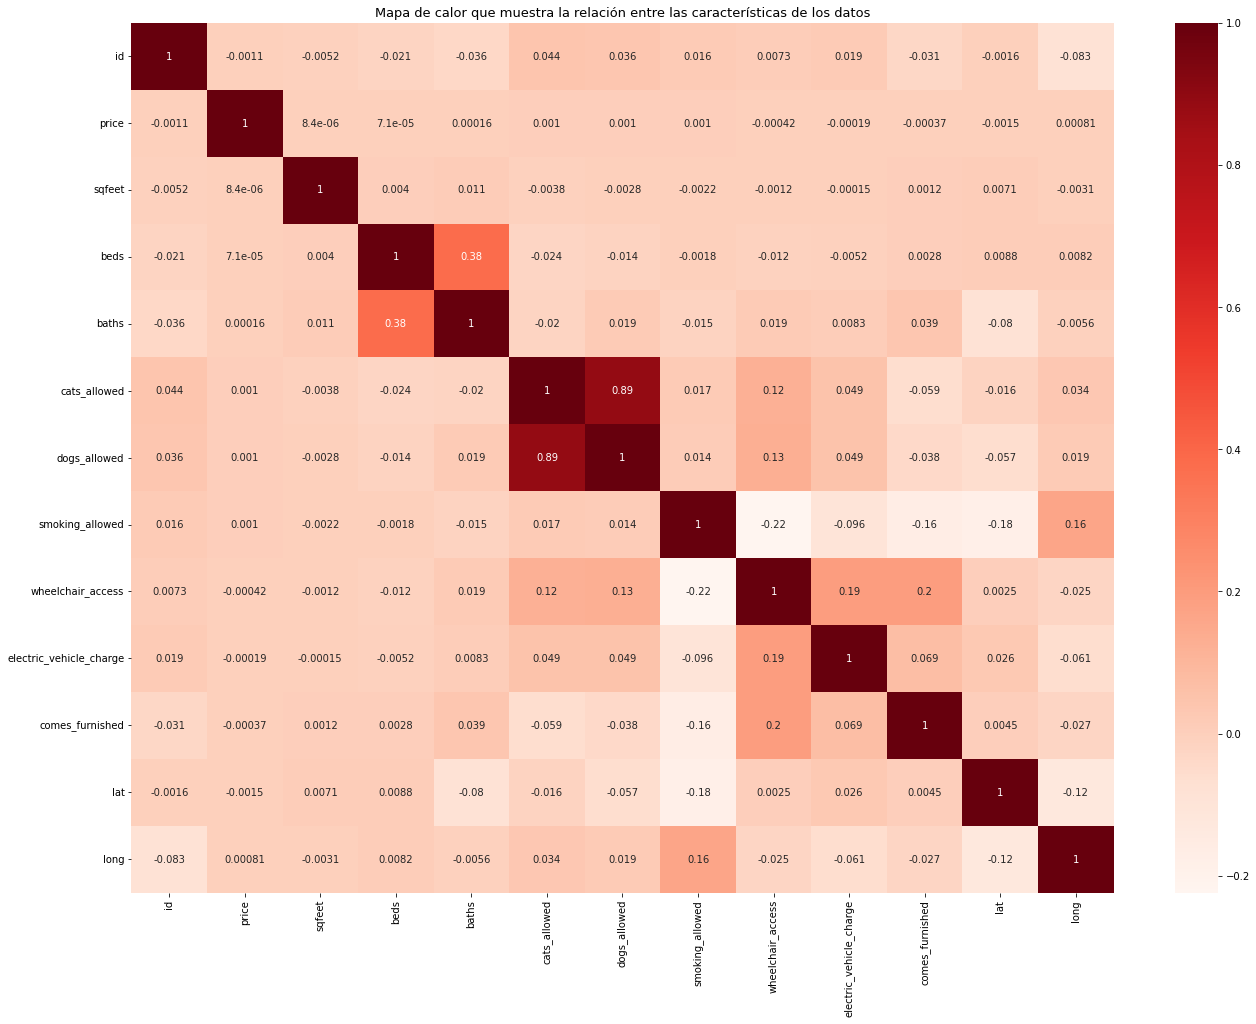

In [10]:
plt.figure(figsize=(22,16))
sns.heatmap(train_df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Mapa de calor que muestra la relación entre las características de los datos',
         fontsize=13)
plt.show()

veamos la frecuencia en 'laundry_options'

In [11]:
train_df['laundry_options'].value_counts ()

w/d in unit           118627
w/d hookups            67941
laundry on site        52949
laundry in bldg        32513
no laundry on site      3278
Name: laundry_options, dtype: int64

In [12]:
#vamos a rellenar con la moda
moda = train_df['laundry_options'].mode()[0]
train_df['laundry_options'] = train_df['laundry_options'].fillna(moda)

veamos la frecuencia en 'parking_options'

In [13]:
train_df['parking_options'].value_counts ()

off-street parking    115612
attached garage        36428
carport                35048
detached garage        15314
street parking         14370
no parking              2882
valet parking            143
Name: parking_options, dtype: int64

In [14]:
#vamos a rellenar con la moda
moda_1 = train_df['laundry_options'].mode()[0]
train_df['parking_options'] = train_df['parking_options'].fillna(moda_1)

vamos a eliminar las filas con valores faltantes en las columnas 'lat' y 'long'

In [15]:
train_df.dropna(subset=['lat', 'long'], inplace=True)


Vamos a eliminar las columnas que no aportan información al modelo, las cuales son 'id', 'url', 'region_url', 'image_url' y 'description'

In [16]:
train_df.drop(['id', 'url', 'region_url', 'image_url','description'], axis=1, inplace=True)

Vamos a ver un bloxplot para las variables 'lat' y 'long' con el fin de detectar outliers, en este caso los outliers posiblemnente corresponderán a ciudades que no se encuentren en Estados Unidos.

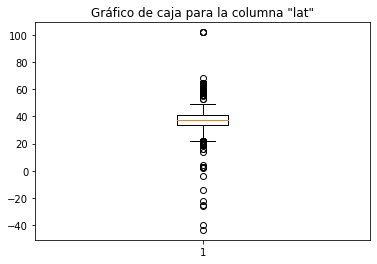

In [17]:
# Creamos un gráfico de caja para la columna 'lat'
plt.boxplot(train_df['lat'], showfliers=True)
plt.title('Gráfico de caja para la columna "lat"')
plt.show()


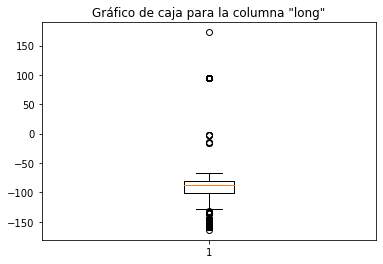

In [18]:
# Creamos un gráfico de caja para la columna 'long'
plt.boxplot(train_df['long'], showfliers=True)
plt.title('Gráfico de caja para la columna "long"')
plt.show()


La latitud de los Estados Unidos varía desde aproximadamente 25 grados sur en la frontera entre México y Texas hasta 49 grados norte en la frontera entre Alaska y Canadá. La longitud de los Estados Unidos varía desde aproximadamente 170 grados oeste en Alaska hasta 67 grados oeste en Maine.
Vamos a eliminar todos los valores en 'lat' y 'long' que esten por fuera de esos rangos.

In [19]:
## Creamos una máscara booleana para las filas que cumplen con los criterios de latitud y longitud
mask= (train_df['lat']>=25) & (train_df['lat']<=49) & (train_df['long']>=-167) & (train_df['long']<=-65)
    

Nota: la longitud se mide en grados desde el Meridiano de Greenwich, que es el punto de referencia para medir la longitud. Los puntos al este del Meridiano de Greenwich tienen longitudes positivas, mientras que los puntos al oeste tienen longitudes negativas.
En el caso de Estados Unidos, la mayoría de los estados están al oeste del Meridiano de Greenwich, por lo que sus longitudes son negativas. Por eso, en el código anterior, se utilizaron valores negativos para definir el rango de longitudes válido.

<p align="center">
  <img width="600" height="400" src="Images/mapaEEUU.png">
</p>

In [20]:
mask.value_counts()

True     340551
False      4206
dtype: int64

In [21]:
# Usamos la máscara para eliminar las filas que no cumplen con los criterios
train_df = train_df[mask]

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340551 entries, 0 to 346478
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   340551 non-null  object 
 1   price                    340551 non-null  int64  
 2   type                     340551 non-null  object 
 3   sqfeet                   340551 non-null  int64  
 4   beds                     340551 non-null  int64  
 5   baths                    340551 non-null  float64
 6   cats_allowed             340551 non-null  int64  
 7   dogs_allowed             340551 non-null  int64  
 8   smoking_allowed          340551 non-null  int64  
 9   wheelchair_access        340551 non-null  int64  
 10  electric_vehicle_charge  340551 non-null  int64  
 11  comes_furnished          340551 non-null  int64  
 12  laundry_options          340551 non-null  object 
 13  parking_options          340551 non-null  object 
 14  lat 

In [23]:
# Creamos la función para clasificar el precio
def classify_price(price):
    if price < 1000:
        return 'low'
    else:
        return 'high'

# Creamos la columna 'category_price'
train_df['category_price'] = train_df['price'].apply(classify_price)


In [24]:
train_df

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,category_price
0,boise,1350,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.2250,id,high
1,colorado springs,1115,apartment,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,38.9137,-104.7800,co,high
2,norfolk / hampton roads,1129,apartment,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,36.7922,-76.1643,va,high
3,phoenix,1580,house,1469,3,2.0,1,1,1,0,0,0,w/d in unit,w/d in unit,33.5623,-112.0560,az,high
4,nashville,995,apartment,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,36.0595,-86.6592,tn,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,evansville,672,apartment,660,1,1.0,1,1,1,0,0,0,laundry on site,w/d in unit,37.9591,-87.5293,in,low
346475,san diego,2122,apartment,1099,2,2.0,1,1,1,0,0,0,w/d in unit,off-street parking,32.6279,-117.0370,ca,high
346476,columbia,1014,apartment,1104,2,2.0,1,1,0,0,0,0,w/d hookups,off-street parking,33.9659,-80.9355,sc,high
346477,north dakota,935,apartment,1050,2,2.0,0,0,0,0,0,0,w/d in unit,detached garage,48.1995,-101.2800,nd,low


Creamos una nueva columna en base a 'category_price' que tenga 1 si es 'low' y 0 si es 'high'. 

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

train_df['target']=labelencoder.fit_transform(train_df['category_price'])
train_df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,category_price,target
0,boise,1350,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.2250,id,high,0
1,colorado springs,1115,apartment,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,38.9137,-104.7800,co,high,0
2,norfolk / hampton roads,1129,apartment,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,36.7922,-76.1643,va,high,0
3,phoenix,1580,house,1469,3,2.0,1,1,1,0,0,0,w/d in unit,w/d in unit,33.5623,-112.0560,az,high,0
4,nashville,995,apartment,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,36.0595,-86.6592,tn,low,1


borramos la columna 'category_price' y la columna 'price

In [26]:
train_df.drop(['category_price', 'price'], axis=1, inplace=True)

In [27]:
train_df.head()

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,target
0,boise,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.2250,id,0
1,colorado springs,apartment,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,38.9137,-104.7800,co,0
2,norfolk / hampton roads,apartment,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,36.7922,-76.1643,va,0
3,phoenix,house,1469,3,2.0,1,1,1,0,0,0,w/d in unit,w/d in unit,33.5623,-112.0560,az,0
4,nashville,apartment,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,36.0595,-86.6592,tn,1


vamos a codificar las variables categoricas para poder convertirlas a numericas.


In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

train_df['region']=labelencoder.fit_transform(train_df['region'])
train_df['type']=labelencoder.fit_transform(train_df['type'])
train_df['laundry_options']=labelencoder.fit_transform(train_df['laundry_options'])
train_df['parking_options']=labelencoder.fit_transform(train_df['parking_options'])
train_df['state']=labelencoder.fit_transform(train_df['state'])

train_df.head()

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,target
0,33,6,1200,2,2.0,1,1,1,0,0,0,4,2,43.5851,-116.2250,12,0
1,64,0,694,1,1.0,1,1,1,0,0,0,4,1,38.9137,-104.7800,5,0
2,233,0,900,2,2.0,0,0,1,0,0,0,3,4,36.7922,-76.1643,44,0
3,266,6,1469,3,2.0,1,1,1,0,0,0,4,7,33.5623,-112.0560,3,0
4,227,0,700,1,1.0,1,1,1,0,0,0,4,1,36.0595,-86.6592,41,1


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340551 entries, 0 to 346478
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   340551 non-null  int32  
 1   type                     340551 non-null  int32  
 2   sqfeet                   340551 non-null  int64  
 3   beds                     340551 non-null  int64  
 4   baths                    340551 non-null  float64
 5   cats_allowed             340551 non-null  int64  
 6   dogs_allowed             340551 non-null  int64  
 7   smoking_allowed          340551 non-null  int64  
 8   wheelchair_access        340551 non-null  int64  
 9   electric_vehicle_charge  340551 non-null  int64  
 10  comes_furnished          340551 non-null  int64  
 11  laundry_options          340551 non-null  int32  
 12  parking_options          340551 non-null  int32  
 13  lat                      340551 non-null  float64
 14  long

Ahora realizamos los mismos cambios del dataset 'train_df' al dataset 'test_df'

In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38498 non-null  int64  
 1   url                      38498 non-null  object 
 2   region                   38498 non-null  object 
 3   region_url               38498 non-null  object 
 4   type                     38498 non-null  object 
 5   sqfeet                   38498 non-null  int64  
 6   beds                     38498 non-null  int64  
 7   baths                    38498 non-null  float64
 8   cats_allowed             38498 non-null  int64  
 9   dogs_allowed             38498 non-null  int64  
 10  smoking_allowed          38498 non-null  int64  
 11  wheelchair_access        38498 non-null  int64  
 12  electric_vehicle_charge  38498 non-null  int64  
 13  comes_furnished          38498 non-null  int64  
 14  laundry_options       

In [31]:
# Vamos a ver los valores nulos en el conjunto de datos
test_df.isnull().sum()

id                             0
url                            0
region                         0
region_url                     0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options             7855
parking_options            14005
image_url                      0
description                    0
lat                          196
long                         196
state                          0
dtype: int64

In [32]:
#veamos la frecuencia en 'laundry_options'
test_df['laundry_options'].value_counts()

w/d in unit           13156
w/d hookups            7627
laundry on site        5924
laundry in bldg        3590
no laundry on site      346
Name: laundry_options, dtype: int64

In [33]:
#vamos a rellenar con la moda
moda = test_df['laundry_options'].mode()[0]
test_df['laundry_options'] = test_df['laundry_options'].fillna(moda)

#lo mismo para 'parking_options'
test_df['parking_options'].value_counts()
test_df['parking_options'] = test_df['parking_options'].fillna(moda_1) 

In [34]:
# vamos a rellenar con cero las filas con valores faltantes en las columnas 'lat' y 'long'
test_df['lat'].fillna(0, inplace=True)
test_df['long'].fillna(0, inplace=True)


Vamos a eliminar las columnas que no aportan información al modelo por ser de tipo strings, las cuales son: 'id', 'url', 'region_url', 'image_url' y 'description'

In [35]:
test_df.drop(['id', 'url', 'region_url', 'image_url','description'], axis=1, inplace=True)

creamos la variable target

In [36]:
test_df['target']=''

vamos a codificar las variables categoricas para poder convertirlas a numericas.

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

test_df['region']=labelencoder.fit_transform(test_df['region'])
test_df['type']=labelencoder.fit_transform(test_df['type'])
test_df['laundry_options']=labelencoder.fit_transform(test_df['laundry_options'])
test_df['parking_options']=labelencoder.fit_transform(test_df['parking_options'])
test_df['state']=labelencoder.fit_transform(test_df['state'])

test_df.head()

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,target
0,9,8,1344,3,2.0,0,0,1,0,0,0,4,4,42.5333,-83.5763,22,
1,370,0,1050,2,1.0,0,0,1,0,0,0,3,4,43.9393,-72.5538,46,
2,9,0,1150,2,2.0,1,1,1,1,0,0,4,1,42.2492,-83.7712,22,
3,112,0,1280,2,2.5,1,1,0,0,0,0,4,0,40.5501,-105.0350,5,
4,53,0,783,2,1.0,1,1,1,0,0,0,1,7,38.0936,-78.5611,45,


Listo, tenemos los dos datasets con las mismas transformaciones. Vamos a implementar el modelo de aprendizaje supervisado el cual será un árbol de decision.

Primero graficamos la varaible target para ver su distribución.

<AxesSubplot: xlabel='target', ylabel='count'>

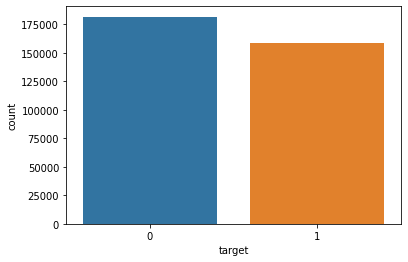

In [38]:
sns.countplot(x='target', data=train_df)

Vamos a escoger las variables X, y

In [39]:
X=train_df.drop(['target'], axis=1)
y= train_df['target']

Separaramos el dataset en dos: train y test data

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test


vemos la forma

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(272440, 16) (68111, 16) (272440,) (68111,)


In [42]:
# Importamos Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Train Decision Tree Classifer
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred= clf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
# print("F1-score:", f1_score(y_test, y_pred))


Accuracy: 0.761727180631616
Recall: 0.8236555072189647


Para evaluar nuestro modelo estamos utilizando las métricas de accuracy y recall. Ahora para mejorar estas métricas existen varios métodos, vamos a probar el método gridsearchCV el cual nos ayudará a encontrar los mejores hiperparámetros.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Creamos una instancia del clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Definimos los parámetros a probar
param_grid = {'max_depth': [3,5,7,10],
              'min_samples_leaf': [2,5,10,20],
              'min_samples_split': [2,5,10,20]}

# Creamos una instancia de GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Entrenamos el modelo con los datos
grid_search.fit(X_train, y_train)

# Imprimimos los mejores parámetros encontrados
print("Mejores parámetros encontrados: ",grid_search.best_params_)


Mejores parámetros encontrados:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [45]:
# Importamos Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Entrenamos Decision Tree Classifer
clf = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=1, min_samples_split=5 )
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred= clf.predict(X_test)


In [46]:
# Evaluación del rendimiento del modelo.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
# print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.8372069122461864
Recall: 0.824191412899565


eleccion de las mejores features para nuestro modelo

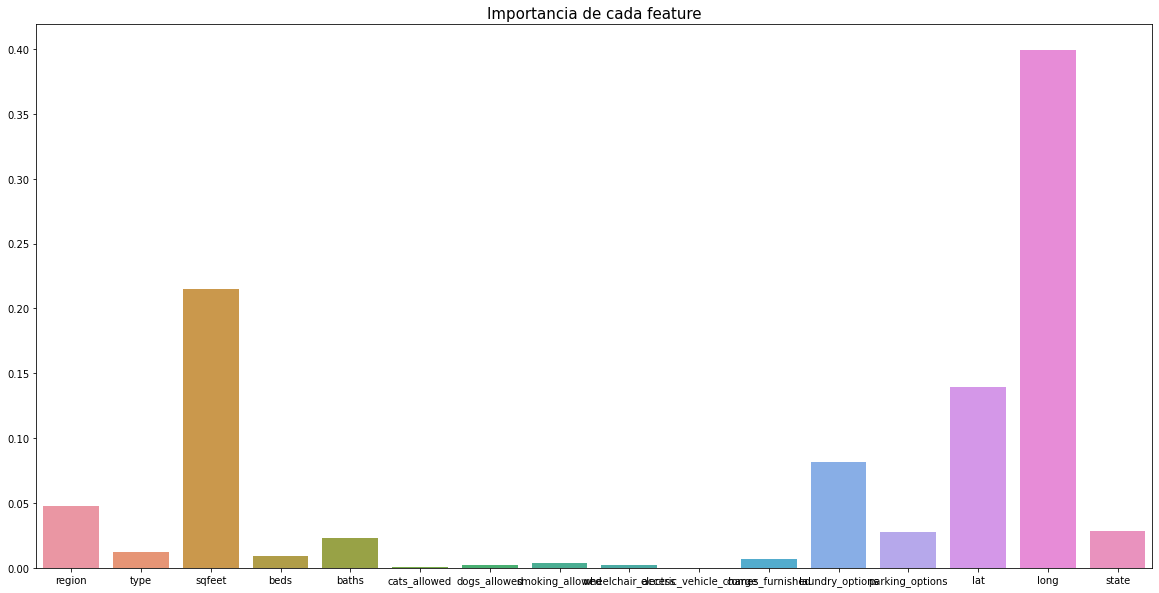

In [47]:
# Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción


plt.figure(figsize = (20,10))

importances = clf.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

el quitar o dejar todas la variables no afecta positivamente al modelo, así que dejamos todas las variables.

vamos a usar un pipeline para mejorar el modelo

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('clf', DecisionTreeClassifier())
])

param_grid = {
    'clf__max_depth': [5, 10, 15, 20],
    'clf__min_samples_leaf': [1, 2, 3, 4],
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='recall')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)


{'clf__max_depth': 20, 'clf__min_samples_leaf': 1}


In [49]:
X=train_df.drop(['target'], axis=1)
y= train_df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test


In [50]:
# Importamos Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Entrenamos Decision Tree Classifer
clf = DecisionTreeClassifier(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=5 )
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred= clf.predict(X_test)


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
# print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.9232576235850303
Recall: 0.9123636592900826


In [52]:
# data for prediction
X_test_pred=test_df.drop('target',axis=1)

In [53]:
pred_tree_test =clf.predict(X_test_pred)

In [54]:
len(pred_tree_test)

38498

In [55]:
pred_t=pd.DataFrame(pred_tree_test, columns=['pred'])
pred_t.to_csv('CamiiloP14.csv', index=False)

Curva ROC

In [56]:
from sklearn.metrics import roc_curve

# Obtener las probabilidades de la clase positiva para el conjunto de prueba
y_probas = clf.predict_proba(X_test)

# Obtener las tasas de verdaderos positivos (TPR) y las tasas de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_probas[:, 1])


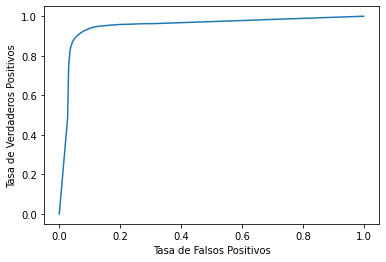

In [57]:
# Dibujar la curva ROC
plt.plot(fpr, tpr)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()


Como la  curva ROC anterior está cerca del punto (0,1), significa que el modelo tiene un rendimiento excelente y es muy efectivo para diferenciar entre las dos clases.

El AUC es una medida numérica del rendimiento del modelo, un modelo con un AUC cercano a 1 es considerado excelente, mientras que un modelo con un AUC cercano a 0.5 es considerado similar al rendimiento de un modelo aleatorio.

In [58]:
from sklearn.metrics import roc_auc_score

# Obtener las probabilidades de la clase positiva para el conjunto de prueba
y_probas = clf.predict_proba(X_test)

# Calcular el AUC
auc = roc_auc_score(y_test, y_probas[:, 1])
print(auc)


0.9489273846239111


como vemos es cercano a 1 lo cual indica que es un modelo con un rendimiento excelente.